In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# StandardScaler is particularly useful when we are dealing with features 
# that are measured in different units. It ensures that all features 
# have the same scale, preventing any one feature from dominating
# the others.
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
player_data_df_raw = pd.read_csv("Player_Stats_Aggregate.csv",
    index_col=["player_id"])

# Display sample data
player_data_df_raw.head(10)

,firstname,lastname,points,minutes,fgm,fga,ftm,fta,tpm,tpa,...,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,fgp,ftp
player_id,,,,,,,,,,,,,,,,,,,,,
8,LaMarcus,Aldridge,641.0,1108.350000,263.0,482.0,100.0,113.0,15.0,52.0,...,76.0,193.0,269.0,48.0,83.0,17.0,47.0,49.0,0.545643,0.884956
17,Justin,Anderson,123.0,356.933333,45.0,118.0,17.0,22.0,16.0,71.0,...,6.0,51.0,57.0,35.0,24.0,10.0,10.0,10.0,0.381356,0.772727
18,Kyle,Anderson,626.0,1801.633333,251.0,559.0,82.0,127.0,42.0,134.0,...,82.0,361.0,443.0,213.0,138.0,92.0,88.0,59.0,0.449016,0.645669
21,Carmelo,Anthony,976.0,1889.783333,339.0,772.0,139.0,166.0,159.0,420.0,...,62.0,240.0,302.0,69.0,177.0,48.0,64.0,54.0,0.439119,0.837349
28,D.J.,Augustin,309.0,922.433333,98.0,234.0,42.0,47.0,71.0,172.0,...,11.0,59.0,70.0,114.0,41.0,17.0,57.0,1.0,0.418803,0.893617
36,Harrison,Barnes,1325.0,2690.816667,412.0,876.0,348.0,421.0,153.0,387.0,...,85.0,363.0,448.0,195.0,101.0,56.0,119.0,15.0,0.470320,0.826603
38,Will,Barton,1137.0,2491.933333,430.0,985.0,106.0,133.0,171.0,466.0,...,52.0,327.0,379.0,295.0,129.0,60.0,137.0,33.0,0.436548,0.796992
44,Kent,Bazemore,177.0,679.983333,60.0,179.0,19.0,25.0,38.0,105.0,...,14.0,73.0,87.0,41.0,90.0,29.0,30.0,10.0,0.335196,0.760000
45,Bradley,Beal,972.0,1524.016667,362.0,811.0,181.0,216.0,67.0,226.0,...,38.0,163.0,201.0,280.0,104.0,41.0,140.0,18.0,0.446363,0.837963


In [4]:
# Generate summary statistics
player_data_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 8 to 3404
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   firstname  421 non-null    object 
 1   lastname   421 non-null    object 
 2   points     421 non-null    float64
 3   minutes    421 non-null    float64
 4   fgm        421 non-null    float64
 5   fga        421 non-null    float64
 6   ftm        421 non-null    float64
 7   fta        421 non-null    float64
 8   tpm        421 non-null    float64
 9   tpa        421 non-null    float64
 10  tpp        421 non-null    float64
 11  offReb     421 non-null    float64
 12  defReb     421 non-null    float64
 13  totReb     421 non-null    float64
 14  assists    421 non-null    float64
 15  pFouls     421 non-null    float64
 16  steals     421 non-null    float64
 17  turnovers  421 non-null    float64
 18  blocks     421 non-null    float64
 19  fgp        405 non-null    float64
 20  ftp        387

In [5]:
#player_data_df['plusMinus']=player_data_df['plusMinus'].astype('float64')

In [6]:
player_data_df = player_data_df_raw.copy()
player_data_df=player_data_df.drop(columns=['firstname'])
player_data_df=player_data_df.drop(columns=['lastname'])
player_data_df = player_data_df.dropna()
#player_data_df = player_data_df[player_data_df["minutes"] > 500].reset_index(drop=True)
player_data_df = player_data_df[player_data_df_raw["minutes"] >= 500]
player_data_df=player_data_df.drop(columns=['minutes'])
player_data_df


,points,fgm,fga,ftm,fta,tpm,tpa,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,fgp,ftp
player_id,,,,,,,,,,,,,,,,,,
8,641.0,263.0,482.0,100.0,113.0,15.0,52.0,569.9,76.0,193.0,269.0,48.0,83.0,17.0,47.0,49.0,0.545643,0.884956
18,626.0,251.0,559.0,82.0,127.0,42.0,134.0,1869.9,82.0,361.0,443.0,213.0,138.0,92.0,88.0,59.0,0.449016,0.645669
21,976.0,339.0,772.0,139.0,166.0,159.0,420.0,2621.5,62.0,240.0,302.0,69.0,177.0,48.0,64.0,54.0,0.439119,0.837349
28,309.0,98.0,234.0,42.0,47.0,71.0,172.0,2077.7,11.0,59.0,70.0,114.0,41.0,17.0,57.0,1.0,0.418803,0.893617
36,1325.0,412.0,876.0,348.0,421.0,153.0,387.0,3011.3,85.0,363.0,448.0,195.0,101.0,56.0,119.0,15.0,0.470320,0.826603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,377.0,148.0,275.0,72.0,98.0,9.0,39.0,441.7,62.0,147.0,209.0,83.0,118.0,29.0,51.0,28.0,0.538182,0.734694
2863,452.0,169.0,365.0,64.0,88.0,50.0,153.0,1727.7,53.0,134.0,187.0,76.0,96.0,36.0,60.0,13.0,0.463014,0.727273
2864,625.0,232.0,534.0,71.0,90.0,90.0,300.0,2128.9,37.0,130.0,167.0,81.0,138.0,45.0,52.0,13.0,0.434457,0.788889


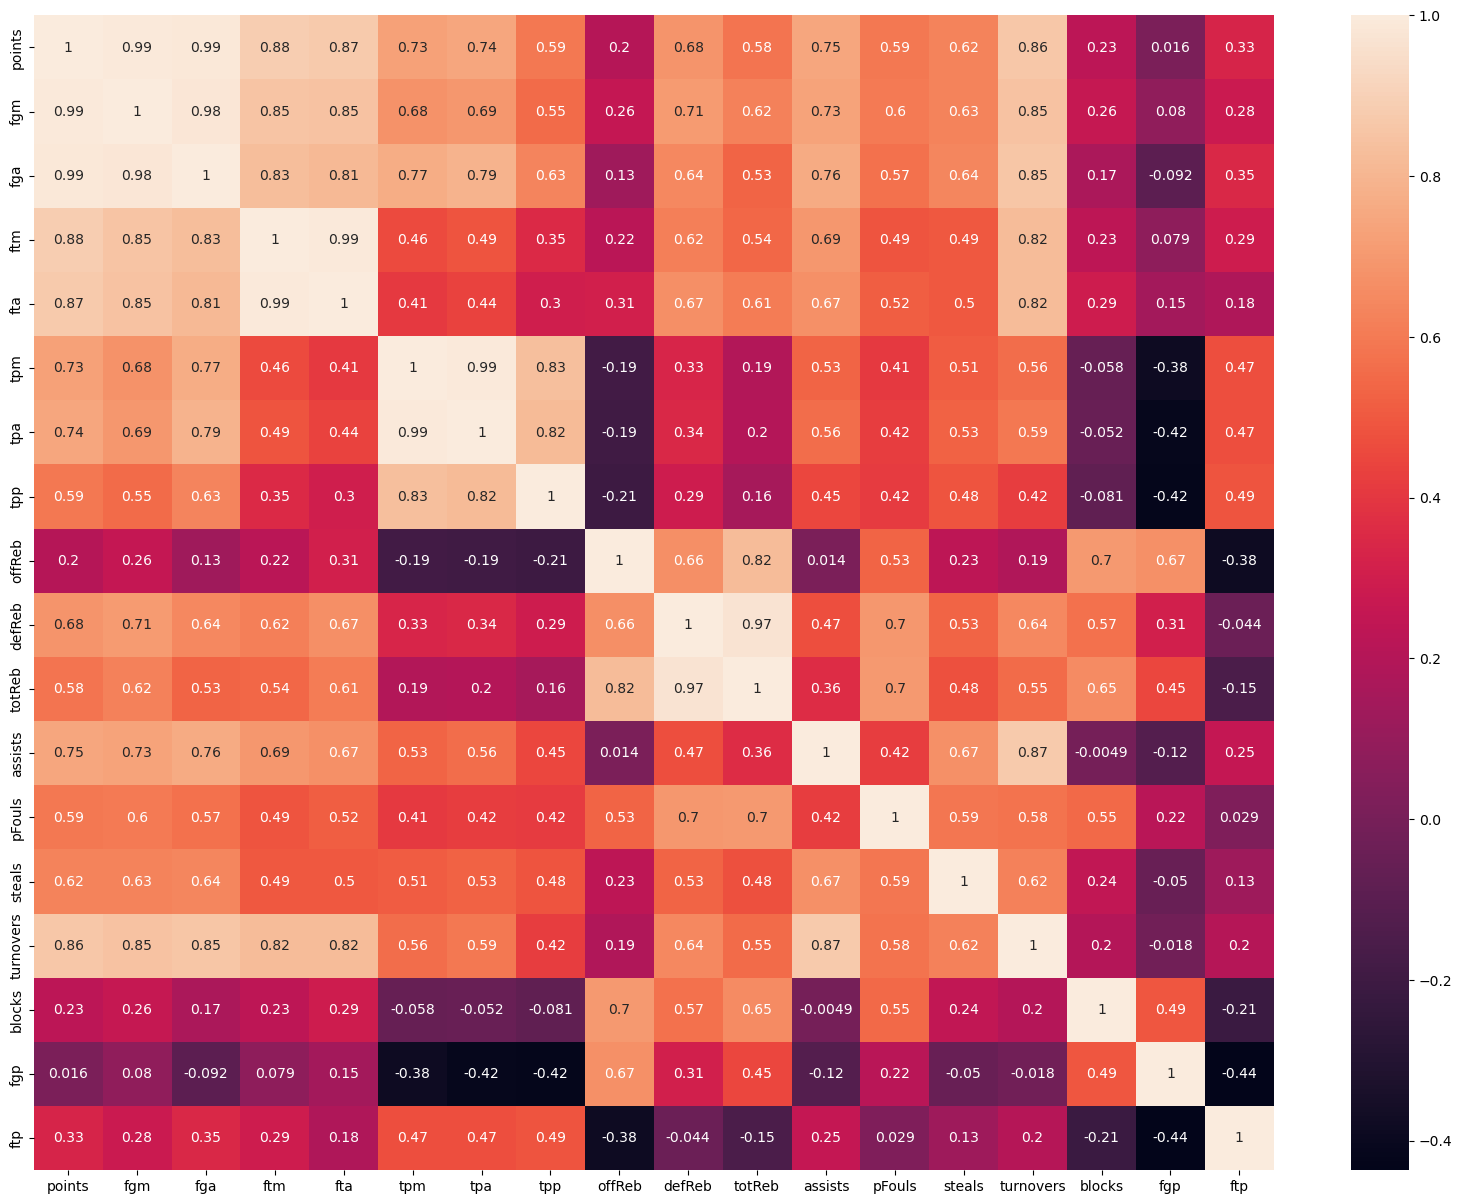

In [7]:
corr_matrix = player_data_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
player_data_df=player_data_df.drop(columns=['fgm'])
player_data_df=player_data_df.drop(columns=['fga'])
player_data_df=player_data_df.drop(columns=['ftm'])
player_data_df=player_data_df.drop(columns=['fta'])
player_data_df=player_data_df.drop(columns=['tpm'])
player_data_df=player_data_df.drop(columns=['tpa'])
player_data_df=player_data_df.drop(columns=['totReb'])

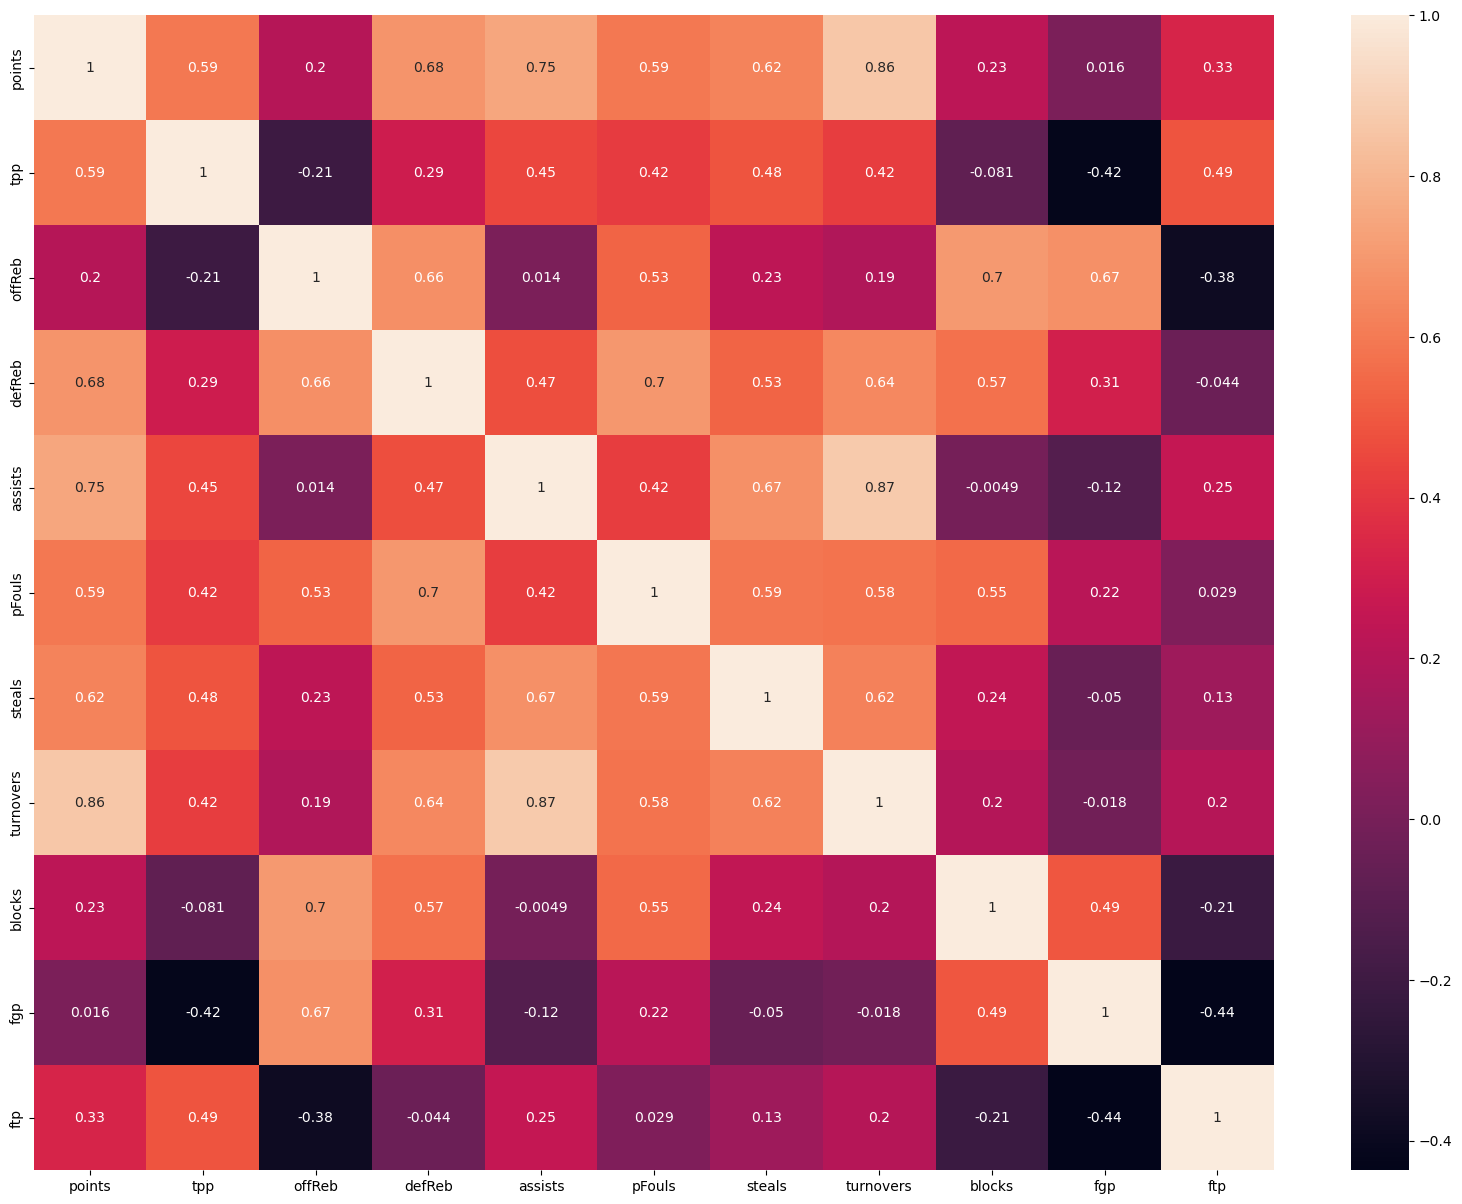

In [9]:
corr_matrix = player_data_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
player_scaled = StandardScaler().fit_transform(
    player_data_df[['points', 'tpp',
       'offReb', 'defReb', 'assists', 'pFouls', 'steals',
       'turnovers', 'blocks', 'fgp', 'ftp']]
)

In [11]:
# Create a DataFrame with the scaled data
player_scaled_data = pd.DataFrame(
    player_scaled,
    columns=[['points', 'tpp',
       'offReb', 'defReb', 'assists', 'pFouls', 'steals',
       'turnovers', 'blocks', 'fgp', 'ftp']]
)


# Set the player_id column as index
player_scaled_data.index = player_data_df.index

# Display sample data
player_scaled_data.head()

,points,tpp,offReb,defReb,assists,pFouls,steals,turnovers,blocks,fgp,ftp
player_id,,,,,,,,,,,
8,-0.227315,-1.370204,0.255883,-0.223070,-0.832713,-0.798797,-1.228049,-0.652350,0.632081,1.198099,1.159424
18,-0.258909,-0.001387,0.373248,1.141521,0.293463,0.122749,1.275524,0.002960,0.986814,-0.184669,-1.275645
21,0.478290,0.789999,-0.017967,0.158691,-0.689382,0.776208,-0.193239,-0.380636,0.809448,-0.326298,0.674964
28,-0.926600,0.217413,-1.015565,-1.311493,-0.382243,-1.502523,-1.228049,-0.492518,-1.070636,-0.617024,1.247564
36,1.213382,1.200434,0.431930,1.157766,0.170607,-0.497200,0.073809,0.498438,-0.574010,0.120192,0.565608


In [12]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [13]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
player_data_pca = pca.fit_transform(player_scaled_data)
# View the first five rows of the DataFrame. 
player_data_pca[:5]

array([[-1.43363647,  1.20637465,  0.5219001 ],
       [ 1.10221113,  1.05318477, -0.27272145],
       [ 0.47443381, -0.11194961,  1.66884522],
       [-2.50824113, -1.7971242 ,  0.25715895],
       [ 1.34345023, -0.71580318,  0.14146515]])

In [14]:
#import numpy as np
pca.explained_variance_ratio_
#pca_explained_variance_ratio

array([0.44305588, 0.27086747, 0.07849945])

In [15]:
# Create a dataframe to understand the weights assigned to each variable for each principal component
feature_weights_df = pd.DataFrame(pca.components_, 
                                  columns=player_scaled_data.columns, 
                                  index=['PCA' + str(i+1) for i in range(len(pca.components_))])

# Display the DataFrame
feature_weights_df

,points,tpp,offReb,defReb,assists,pFouls,steals,turnovers,blocks,fgp,ftp
PCA1,0.402144,0.244816,0.206988,0.381554,0.346002,0.368074,0.354206,0.393787,0.209749,0.062383,0.079402
PCA2,-0.133653,-0.345145,0.466732,0.182634,-0.217753,0.123657,-0.087175,-0.119594,0.388123,0.472234,-0.391871
PCA3,-0.068986,0.410823,0.093085,0.063475,-0.474051,0.296030,-0.085966,-0.343946,0.374278,-0.163111,0.457204


In [16]:
# Create a new DataFrame with the PCA data.
player_data_pca = pd.DataFrame(
    
# Creating a DataFrame with the PCA data
    player_data_pca,columns=["PC1", "PC2", "PC3"])
# Copy the crypto names from the original data
player_data_pca["player_id"] = player_data_df.index

# Set the coinid column as index
player_data_pca = player_data_pca.set_index("player_id")


# Display sample data
player_data_pca.head()

,PC1,PC2,PC3
player_id,,,
8,-1.433636,1.206375,0.521900
18,1.102211,1.053185,-0.272721
21,0.474434,-0.111950,1.668845
28,-2.508241,-1.797124,0.257159
36,1.343450,-0.715803,0.141465


In [17]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [18]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(player_data_pca)
    inertia.append(k_model.inertia_)
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `player_data_pca`
# 3. Append the model.inertia_ to the inertia list
inertia

[2353.4957204444113,
 1410.6355041625955,
 1001.4989631208597,
 784.6498728420564,
 649.1733887546,
 542.9819327557033,
 489.01772748921576,
 437.20504044751544,
 407.0699405442708,
 381.3217332080539]

In [19]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,2353.495720
1,2,1410.635504
2,3,1001.498963
3,4,784.649873
4,5,649.173389
5,6,542.981933
6,7,489.017727
7,8,437.205040
8,9,407.069941
9,10,381.321733


In [20]:
# Plot a line chart with all the inertia values computed with 
elbow_plot_original = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
# the different values of k to visually identify the optimal value for k.
elbow_plot_original

:Curve   [k]   (inertia)

In [21]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [22]:
# Fit the K-Means model using the PCA data
model.fit(player_data_pca)

KMeans(n_clusters=4, random_state=0)

In [23]:
# Predict the clusters to group the cryptocurrencies using the PCA data
players_cluster = model.predict(player_data_pca)
# Print the resulting array of cluster values.
players_cluster

array([3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 1, 2, 3, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 3, 2, 2,
       1, 2, 2, 3, 3, 1, 0, 2, 1, 2, 3, 1, 2, 0, 3, 3, 0, 3, 1, 1, 1, 3,
       0, 3, 2, 0, 3, 1, 2, 0, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 3, 3,
       2, 3, 3, 2, 1, 2, 3, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 2, 1, 2, 0, 1, 3, 0, 3, 3, 0, 2, 3, 2, 2, 3, 0, 0, 2, 3, 0,
       3, 1, 2, 3, 2, 1, 1, 2, 3, 1, 2, 3, 0, 3, 1, 2, 3, 1, 3, 0, 3, 2,
       2, 2, 0, 3, 1, 2, 3, 2, 0, 2, 2, 0, 2, 3, 0, 1, 2, 2, 2, 0, 0, 1,
       0, 1, 2, 3, 2, 2, 3, 3, 2, 2, 3, 1, 3, 2, 3, 1, 1, 3, 2, 2, 2, 3,
       3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 2, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 0, 2, 2, 2, 3, 3, 3, 0, 0, 3, 3, 2, 3, 3,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 3, 1, 2, 2, 2, 0, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 3], dtype=int32)

In [24]:
# Create a copy of the DataFrame with the PCA data
df_player_data_pca_predictions = player_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_player_data_pca_predictions["PlayerCluster"] = players_cluster

# Display sample data
df_player_data_pca_predictions.head()

,PC1,PC2,PC3,PlayerCluster
player_id,,,,
8,-1.433636,1.206375,0.521900,3
18,1.102211,1.053185,-0.272721,2
21,0.474434,-0.111950,1.668845,2
28,-2.508241,-1.797124,0.257159,3
36,1.343450,-0.715803,0.141465,2


In [25]:
# Create a scatter plot using hvPlot by setting 
df_player_data_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="PlayerCluster",
    hover_cols = "player_id"
)
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


:NdOverlay   [PlayerCluster]
   :Scatter   [PC1]   (PC2,player_id)

In [26]:
df_player_data_pca_predictions.to_csv("player_pca_clusters.csv")